In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('Salary.xlsx')
df.head(3)

,Student,School_Ranking,GPA,Experience,Salary
0,1,78.0,2.92,3,73590
1,2,56.0,3.84,9,87000
2,3,23.0,3.04,6,76970


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Student         114 non-null    int64  
 1   School_Ranking  114 non-null    float64
 2   GPA             114 non-null    float64
 3   Experience      114 non-null    int64  
 4   Salary          114 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 4.6 KB


In [4]:
df.describe()

,Student,School_Ranking,GPA,Experience,Salary
count,114.000000,114.000000,114.000000,114.000000,114.000000
mean,57.500000,143.283626,3.487544,5.026316,61600.333333
std,33.052988,87.372728,0.303220,1.525364,13318.907116
min,1.000000,15.000000,2.760000,2.000000,45074.000000
25%,29.250000,71.500000,3.250000,4.000000,50414.750000
50%,57.500000,118.583333,3.495000,5.000000,55233.000000
75%,85.750000,217.458333,3.757500,6.000000,76965.000000
max,114.000000,316.333333,3.990000,9.000000,87000.000000


In [5]:
df.isnull().sum()

Student           0
School_Ranking    0
GPA               0
Experience        0
Salary            0
dtype: int64

In [6]:
df.skew(axis = 0, skipna = True)

Student           0.000000
School_Ranking    0.476762
GPA              -0.191141
Experience        0.381308
Salary            0.526090
dtype: float64

In [7]:
x_corr = df.corr()
x_corr

,Student,School_Ranking,GPA,Experience,Salary
Student,1.000000,0.948277,0.795718,-0.311117,-0.773404
School_Ranking,0.948277,1.000000,0.848395,-0.224579,-0.650048
GPA,0.795718,0.848395,1.000000,0.012960,-0.505421
Experience,-0.311117,-0.224579,0.012960,1.000000,0.569178
Salary,-0.773404,-0.650048,-0.505421,0.569178,1.000000


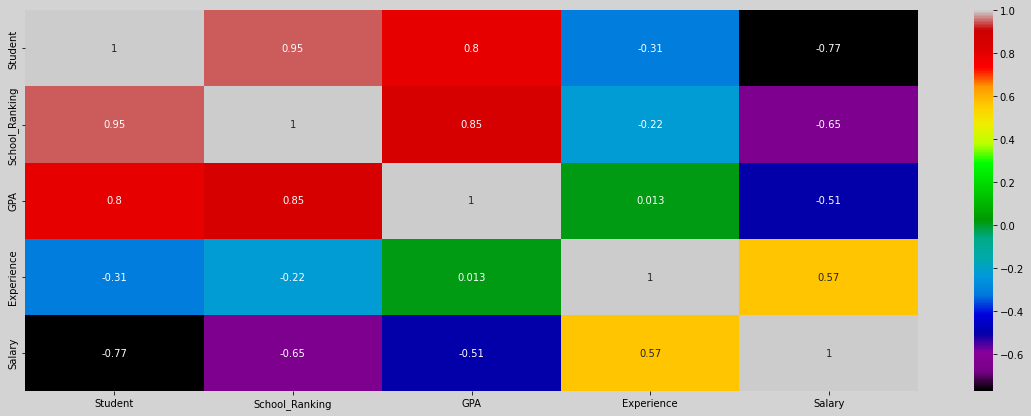

In [8]:
plt.figure(figsize=(20, 7),facecolor="lightgrey",frameon=True,edgecolor='blue') 
sns.heatmap(x_corr, annot=True, cmap='nipy_spectral');
plt.show()

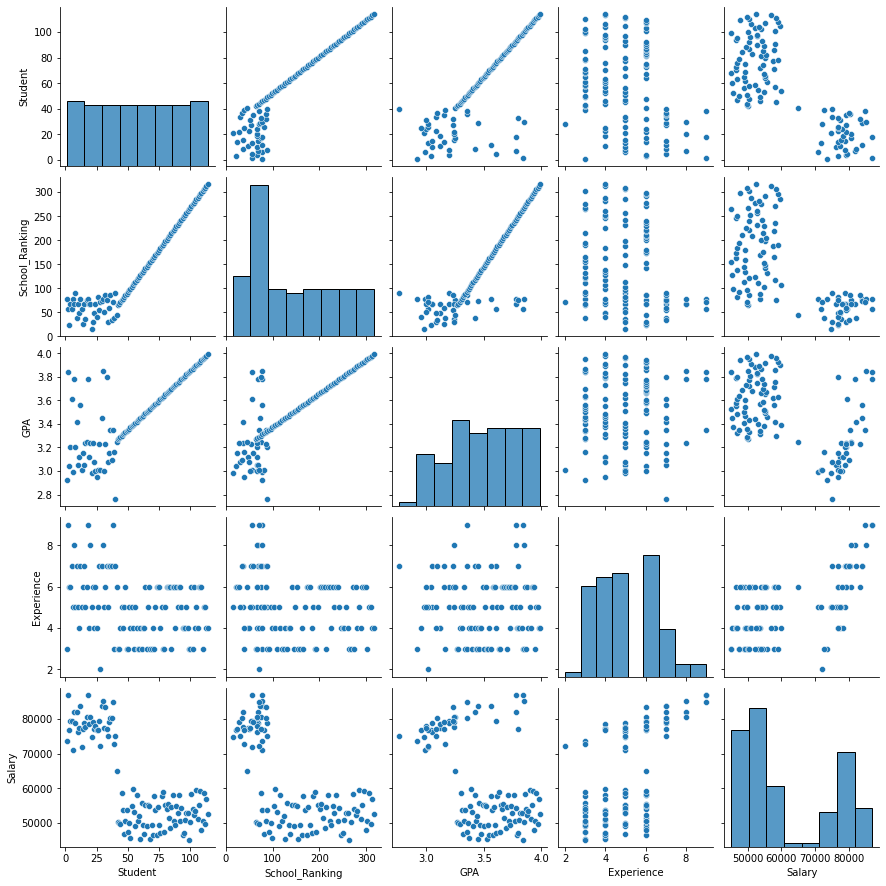

In [9]:
sns.pairplot(df);

In [10]:
y_dep=df.Salary
x_ind=df.drop(["Salary","Student"],axis=1)

In [11]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_ind,y_dep, test_size = 0.2,random_state=1)

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() 
model.fit(x_train, y_train) 
y_pred = model.predict(x_test) 
y_pred

array([48234.13120495, 67276.72169928, 59377.14798948, 60118.16461917,
       55462.03398411, 44620.17981537, 41539.20795835, 54489.20043767,
       74716.75873733, 62202.11684338, 60952.30676752, 47932.96858915,
       77075.93289861, 54094.9123032 , 42512.04150479, 60280.63583688,
       54697.2375348 , 47029.48074176, 52820.91614097, 59307.80229044,
       62527.46554555, 79713.00585247, 48465.9481217 ])

In [13]:
f_comp = pd.DataFrame({"Actual": y_test, "M_Predicted": y_pred}) 
f_comp.head()

,Actual,M_Predicted
93,46552,48234.131205
44,58454,67276.721699
56,58142,59377.147989
82,51255,60118.164619
69,46459,55462.033984


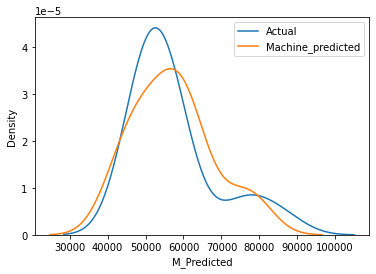

In [14]:
sns.distplot(f_comp['Actual'], hist=False) 
sns.distplot(f_comp['M_Predicted'], hist=False) 
plt.legend(['Actual', 'Machine_predicted']) 
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, y_pred)
mse

52076908.07132213

In [16]:
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
rms

7216.433195930114

In [17]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('r2 score for linear model is', r2 *100)

r2 score for linear model is 56.918321107961425


In [18]:
model.predict([[14,3.2,7]]).round()

array([80388.])

# deployment

In [19]:
import gradio as gr

In [20]:
def salary(school_ranking,gpa,experience):
    input1=np.array([school_ranking,gpa,experience])
    output1=model.predict([input1])
    return output1[0]

In [21]:
salary(14,3.2,7)

80387.58852069972

In [22]:
interface = gr.Interface(fn = salary, inputs = ['number','number','number'], outputs = ["number"])

In [23]:
interface.launch()

Running on local URL:  http://127.0.0.1:7862/

To create a public link, set `share=True` in `launch()`.


(<Flask 'gradio.networking'>, 'http://127.0.0.1:7862/', None)

In [24]:
interface = gr.Interface(fn = salary,
inputs=[gr.inputs.Slider(1,60,label = "school_ranking"), gr.inputs.Slider(1,10,label = "gpa"),gr.inputs.Slider(1,15,label = "experience")], 
outputs = ["number"])

In [25]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7863/
Running on public URL: https://37459.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7863/',
 'https://37459.gradio.app')